In [46]:
import math as m
import random as r
import matplotlib.pyplot as plt

In [47]:
def func(x1, x2):
    return 3 - m.pow(x1,2) - m.pow(x2,2)

In [48]:
class Particle:
    def __init__(self, x, y, v_x, v_y, func, min, max):
        self.x = x
        self.y = y
        self.v_x = v_x
        self.v_y = v_y
        self.func = func
        self.score = func(x,y)
        self.best_score = self.score
        self.best_x = x
        self.best_y = y
        self.min = min
        self.max = max

    def update(self, new_v_x, new_v_y):
        new_x = self.x + new_v_x
        new_y = self.y + new_v_y
        self.v_x = new_v_x
        self.v_y = new_v_y
        
        if (new_x > self.max):
            self.x = self.max
        elif (new_x < self.min):
            self.x = self.min
        else:
            self.x = new_x

        if (new_y > self.max):
            self.y = self.max
        elif (new_y < self.min):
            self.y = self.min
        else:
            self.y = new_y
        
        self.score = self.func(self.x, self.y)
        if (self.score > self.best_score):
            self.best_score = self.score
            self.best_x = self.x
            self.best_y = self.y

        

In [49]:
def plot_particles(particles, min, max):
    particles_x = []
    particles_y = []

    for particle in particles:
        particles_x.append(particle.x)
        particles_y.append(particle.y)

    plt.xlim(left=min-1, right=max+1)
    plt.ylim(bottom=min-1, top=max+1)
    plt.scatter(particles_x, particles_y, color="blue", alpha=0.3)

    plt.show()

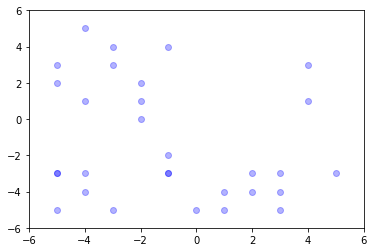

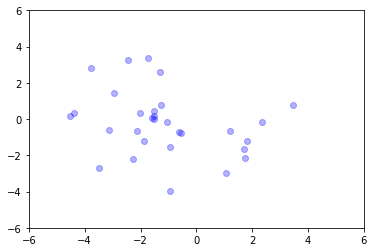

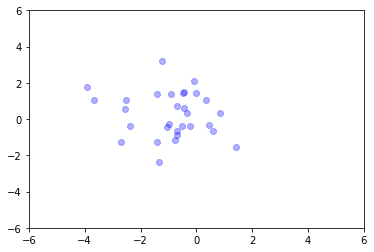

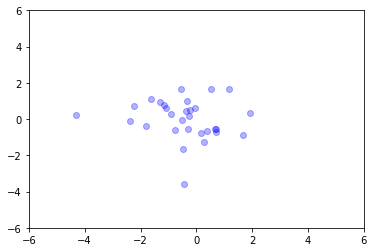

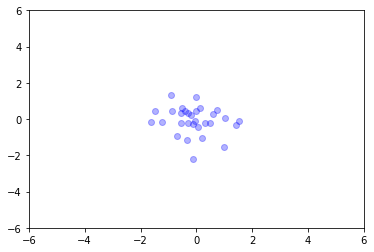

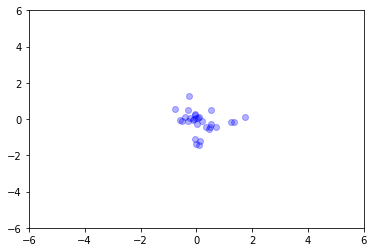

(2.9977527543749796, -0.01194652497117743, 0.045875114889592394)

In [50]:
def PSO(num_iterations=5, num_particles=30, w=0.5, c1=1, c2=1, min=-5, max=5):
    particles = []
    for i in range(num_particles):
        particle = Particle(r.randint(min,max), r.randint(min,max), r.random(), r.random(), func, min, max)
        if i == 0:
            optimal_score = particle.score
            optimal_pos_x = particle.x
            optimal_pos_y = particle.y
        else:
            if (particle.score > optimal_score):
                optimal_score = particle.score
                optimal_pos_x = particle.x
                optimal_pos_y = particle.y
        particles.append(particle)

    plot_particles(particles, min, max)
    
    for i in range(num_iterations):
        for particle in particles:
            v_x = w * particle.v_x + c1 * r.random() * (optimal_pos_x - particle.x) + c2 * r.random() * (particle.best_x - particle.x)
            v_y = w * particle.v_y + c1 * r.random() * (optimal_pos_y - particle.y) + c2 * r.random() * (particle.best_y - particle.y)
            particle.update(v_x, v_y)
            
        for particle in particles:
            if particle.score > optimal_score:
                optimal_score = particle.score
                optimal_pos_x = particle.x
                optimal_pos_y = particle.y

        plot_particles(particles, min, max)

    return (optimal_score, optimal_pos_x, optimal_pos_y)


PSO()
